# Exercício 3

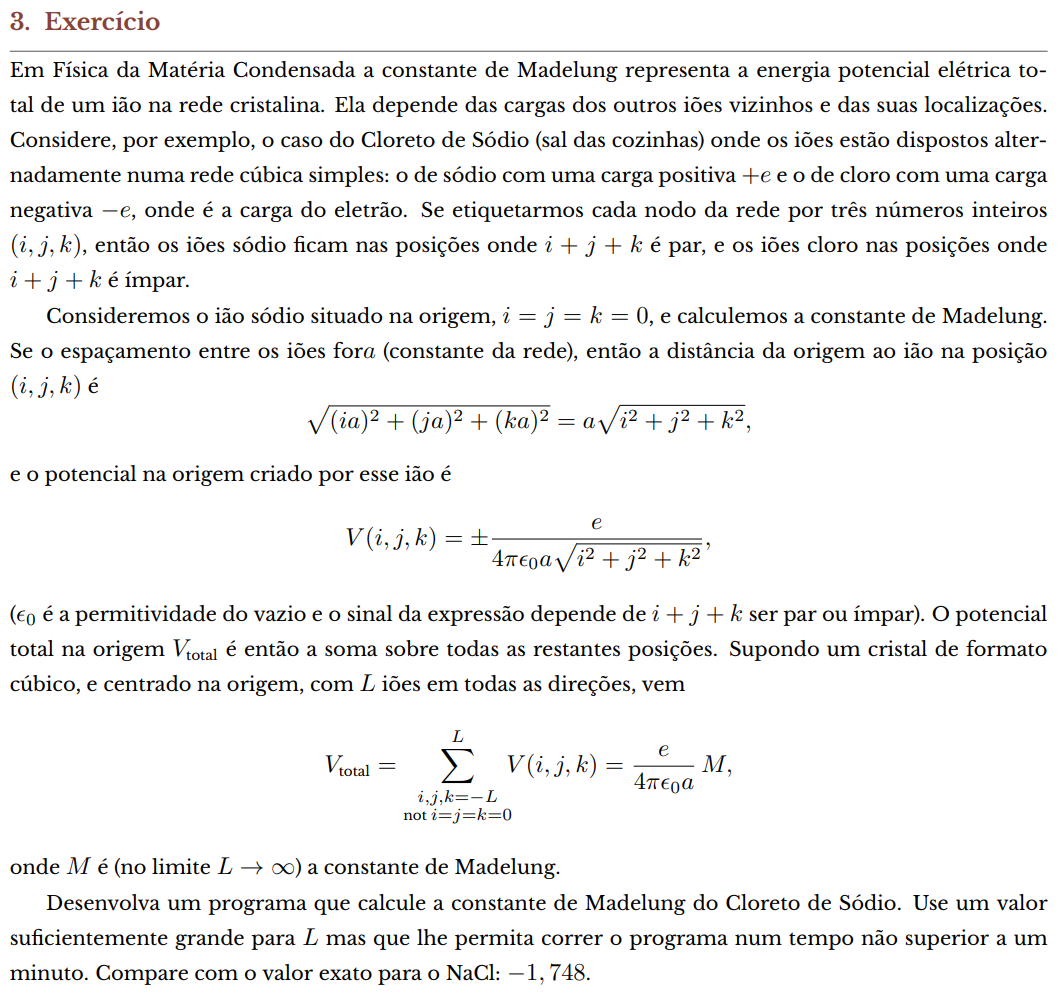

Podemos escrever:

$$
\begin{align*}

V_\text{total} &= \sum V(i, j, k) =
\\\\

&= \sum\pm\frac{e}{4\pi \varepsilon_0a\sqrt{i^2+j^2+k^2}} =
\\\\

&= \frac{e}{4\pi \varepsilon_0a}\sum\frac{\pm 1}{\sqrt{i^2+j^2+k^2}}

\end{align*}
$$

Onde no somatório consideramos todos os valores de $i, j, k \in \Z$ tal que $i, j, k \in [-L, L]$ excluindo $i=j=k=0$. Temos então:

$$
M = \sum\frac{\pm 1}{\sqrt{i^2+j^2+k^2}}
$$

Vamos então calcular a constante de Madelung com um número arbitrário de passos:

In [25]:
# Parâmetros
L = 100

# Calcular a constante M
M = 0
for i in range(-L, L + 1):
    for j in range(-L, L + 1):
        for k in range(-L, L + 1):
            
            # Excluir a origem
            if i==0 and j==0 and k==0:
                continue
            
            # Carga do ponto
            if (i+j+k) % 2 == 0:
                q = 1
            else:
                q = -1
            
            M += q / ((i**2 + j**2 + k**2) ** 0.5)

print(f"A constante de Madelung é aproximadamente: {M:.3f}")

A constante de Madelung é aproximadamente: -1.742


Podemos otimizar a nossa solução do seguinte modo:
- Usar a simetria do problema, calculando apenas as distâncias num octante
- Guardar os valores das distâncias para otimizar a nossa solução

In [26]:
# Parâmetros
L = 100

# Calcular a carga total a uma dada distância da origem
dists = dict()
for i in range(0, L + 1):
    mi = 1 if i == 0 else 2

    for j in range(0, L + 1):
        mj = 1 if j == 0 else 2

        for k in range(0, L + 1):
            mk = 1 if k == 0 else 2
            mtotal = mi * mj * mk

            # Excluir a origem
            if mtotal == 1:
                continue
            
            # Sinal da carga a uma certa distância da origem
            if (i+j+k) % 2 == 0:
                q = mtotal
            else:
                q = -mtotal
            
            d = i**2 + j**2 + k**2
            dists[d] = dists.get(d, 0) + q

# Calcular M
M = 0
for d in dists:
    q = dists[d]
    M += q / d**0.5

print(f"A constante de Madelung é aproximadamente: {M:.3f}")

A constante de Madelung é aproximadamente: -1.742


Podemos otimizar ainda mais a solução considerando o seguinte:
- A cada distância $d$ há apenas um certo número de pontos de coordenadas $(i, j, k)$ tal que $d^2 = i^2+j^2+k^2$
- Podemos então procurar pares distintos de $(i, j, k)$ tal que $d^2 = i^2+j^2+k^2$ e multiplicar pelas permutações de $(i, j, k)$

Por fim, podemos também calcular incialmente todos os quadrados que vamos precisar.

In [29]:
# Parâmetros
L = 100


# Calcular e guardar os quadrados de todos os números que vamos precisar
quadrados = []
for n in range(0, L + 1):
    quadrados += [n**2]

# Calcular a carga total a uma dada distância da origem
dists = dict()
for i in range(0, L + 1):
    mi = 1 if i == 0 else 2
    i2 = quadrados[i]

    for j in range(i, L + 1):
        mij = mi * (1 if j == 0 else 2)
        ij2 = i2 + quadrados[j]
        ij = i == j

        for k in range(j, L + 1):
            mijk = mij * (1 if k == 0 else 2)
            d = ij2 + quadrados[k]
            jk = j == k


            # Permutações
            if ij and jk:
                perms = 1

                # Excluir a origem
                if i == 0:
                    continue
            elif ij or jk:
                perms = 3
            else:
                perms = 6

            # Multiplicador total
            mtotal = mijk * perms
            
            # Sinal da carga a uma certa distância da origem
            if (i+j+k) % 2 == 0:
                q = mtotal
            else:
                q = -mtotal
            
            dists[d] = dists.get(d, 0) + q

# Calcular M
M = 0
for d in dists:
    q = dists[d]
    M += q / d**0.5

print(f"A constante de Madelung é aproximadamente: {M:.3f}")

A constante de Madelung é aproximadamente: -1.747
